<a href="https://colab.research.google.com/github/Ash-star1/project/blob/main/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain_f,ytrain_f),(xtest,ytest) = fashion_mnist.load_data()     

In [ ]:
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[ytrain_f[4]]

'T-shirt'

In [ ]:
xtrain_f = xtrain_f.reshape((60000,28,28,1))
xtest = xtest.reshape((10000,28,28,1 ))

In [ ]:
xtrain_n = xtrain_f/255.
xtest_n = xtest/255.

In [ ]:
x_valid,xtrain = xtrain_n[:5000],xtrain_n[5000:]
y_valid,ytrain = ytrain_f[:5000],ytrain_f[5000:]
xtest = xtest_n

In [ ]:
np.random.seed(50)
tf.random.set_seed(50)

In [ ]:
model =keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (4, 4), strides=1, padding = 'valid', activation = 'relu',input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 300)               1382700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(xtrain,ytrain,epochs=20,batch_size=64,
                    validation_data=(x_valid,y_valid))

Epoch 1/20
860/860 [==============================] - 39s 45ms/step - loss: 0.8789 - accuracy: 0.7061 - val_loss: 0.6204 - val_accuracy: 0.7646
Epoch 2/20
860/860 [==============================] - 31s 36ms/step - loss: 0.5483 - accuracy: 0.8005 - val_loss: 0.5692 - val_accuracy: 0.7780
Epoch 3/20
860/860 [==============================] - 32s 37ms/step - loss: 0.4850 - accuracy: 0.8240 - val_loss: 0.5007 - val_accuracy: 0.8188
Epoch 4/20
860/860 [==============================] - 32s 37ms/step - loss: 0.4465 - accuracy: 0.8394 - val_loss: 0.5344 - val_accuracy: 0.8014
Epoch 5/20
860/860 [==============================] - 31s 36ms/step - loss: 0.4199 - accuracy: 0.8494 - val_loss: 0.4205 - val_accuracy: 0.8494
Epoch 6/20
860/860 [==============================] - 31s 36ms/step - loss: 0.3945 - accuracy: 0.8590 - val_loss: 0.3824 - val_accuracy: 0.8622
Epoch 7/20
860/860 [==============================] - 31s 36ms/step - loss: 0.3749 - accuracy: 0.8656 - val_loss: 0.3694 - val_accuracy:

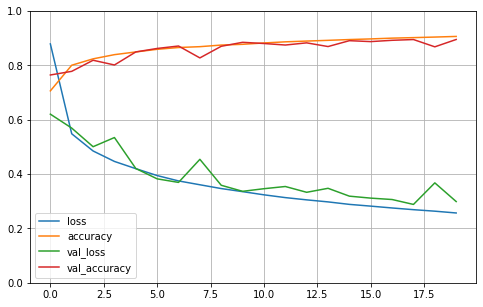

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
e = model.evaluate(xtest_n,ytest)
e

313/313 [==============================] - 2s 6ms/step - loss: 0.3143 - accuracy: 0.8869


[0.3143252730369568, 0.886900007724762]

In [ ]:
x_new = xtest[:5]

In [ ]:
yprediction = model.predict(x_new)
yprediction

array([[2.4819734e-05, 1.4940348e-06, 1.1772616e-05, 1.3267296e-05,
        1.0575724e-05, 3.3412431e-03, 1.7643251e-05, 1.2414195e-02,
        4.9839553e-04, 9.8366666e-01],
       [5.9132188e-05, 1.5668992e-07, 9.9102235e-01, 8.8779139e-08,
        8.4770909e-03, 6.9959443e-09, 4.4096497e-04, 4.9070144e-11,
        1.3847367e-07, 1.6194353e-09],
       [9.3824482e-08, 9.9998951e-01, 1.2742623e-08, 2.0374991e-06,
        8.2330143e-06, 6.4549049e-08, 1.2631649e-08, 1.2309734e-10,
        2.3580915e-10, 1.7357821e-10],
       [1.0204660e-07, 9.9994397e-01, 4.6249365e-08, 3.5319830e-05,
        2.0314355e-05, 2.6335101e-07, 7.4852807e-08, 9.0642488e-10,
        3.9415360e-10, 5.1234874e-09],
       [1.2604631e-01, 5.7137251e-04, 4.0155780e-02, 1.2705344e-03,
        1.6215323e-02, 1.7869472e-05, 8.1556392e-01, 1.4625351e-05,
        5.8906724e-05, 8.5458050e-05]], dtype=float32)

In [ ]:
ytest[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

AxesImage(54,36;334.8x217.44)


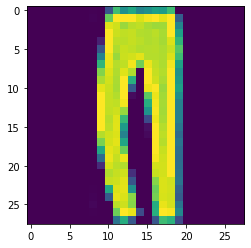

In [ ]:
print(plt.imshow(xtest[2].reshape((28,28))))

In [ ]:
keras.backend.clear_session

<function keras.backend.clear_session>

In [ ]:
del model